In [31]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, disk
from skimage.filters import threshold_otsu
from skimage.transform import rescale

from scipy import misc

Pretty printing has been turned ON


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

(-0.5, 779.5, 779.5, -0.5)

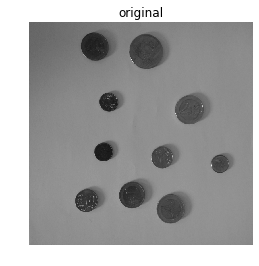

In [32]:
coins_im=img_as_ubyte(rgb2gray(imread('./images/coins.jpg')))

coins_im=misc.imresize(coins_im,25)
plt.figure()
imshow(coins_im)
plt.title('original')
plt.axis('off')


Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

(-0.5, 779.5, 779.5, -0.5)

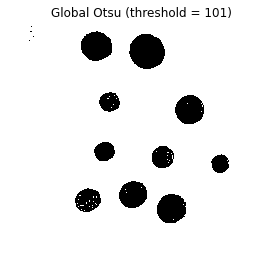

In [38]:

from skimage import data
from skimage.filters import threshold_otsu, rank

threshold_global_otsu = threshold_otsu(coins_im)
global_otsu = coins_im >= threshold_global_otsu
plt.figure()
imshow(global_otsu, cmap=plt.cm.gray)
plt.title('Global Otsu (threshold = %d)' % threshold_global_otsu)
plt.axis('off')

Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

(-0.5, 779.5, 779.5, -0.5)

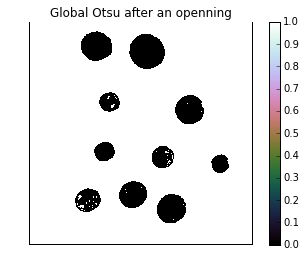

In [97]:

plt.figure()


open_im=morphology.binary_dilation(global_otsu).astype(np.uint8)

open_im=morphology.binary_dilation(open_im).astype(np.uint8)

open_im=morphology.binary_erosion(open_im).astype(np.uint8)

open_im=morphology.binary_erosion(open_im).astype(np.uint8)



imshow(open_im)
plt.title('Global Otsu after an openning')
plt.axis('off')
#o we first dilate the white part  to make noise disapear then we erode it to get back to
#the original coins size

Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

number of objects : 11
radius of the n region :  182.773123959  pixels
radius of the n region :  210.258405333  pixels
radius of the n region :  205.660948597  pixels
radius of the n region :  212.693434176  pixels
radius of the n region :  126.882250994  pixels
radius of the n region :  299.676190233  pixels
radius of the n region :  110.518289963  pixels
radius of the n region :  241.036579926  pixels
radius of the n region :  422.419353931  pixels
radius of the n region :  238.021861301  pixels


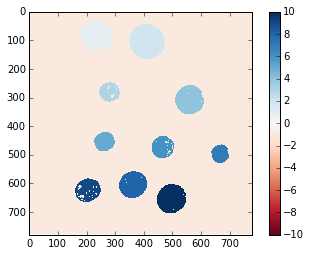

In [105]:

from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.color import label2rgb
from skimage import morphology
from PIL import Image
import PIL.ImageOps    


[label_im,label_num]=label(open_im,background = True, return_num = True)


region_pro=regionprops(label_im,intensity_image=None, cache=True)
print ("number of objects :",label_num)
for region in region_pro:
       print("radius of the n region : ", region.perimeter/2 ," pixels")
        
imshow(label_im)

## Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

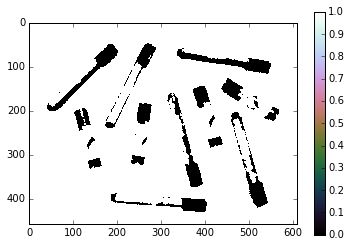

In [226]:
from scipy import ndimage

obj_im=img_as_ubyte(rgb2gray(imread('./images/objets4.jpg')))
radius = 10
selem = disk(radius)

height, width = obj_im.shape[:2]
#(obj_im[h][w]<90) | 

threshold_global_otsu = threshold_otsu(obj_im)
global_otsu = obj_im >= threshold_global_otsu
        
        #local_otsu = rank.otsu(obj_im, selem)

sx = ndimage.sobel(global_otsu, axis=0, mode='constant')
sy = ndimage.sobel(global_otsu, axis=1, mode='constant')
sob = np.hypot(sx, sy)

[label_im,label_num]=label(open_im,background = True, return_num = True)
#a=np.histogram(obj_im)


open_im=morphology.binary_erosion(open_im).astype(np.uint8)

open_im=morphology.binary_erosion(open_im).astype(np.uint8)

open_im=morphology.binary_dilation(global_otsu).astype(np.uint8)

open_im=morphology.binary_dilation(open_im).astype(np.uint8)



imshow(open_im)

#[label_im,label_num]=label(local_otsu,background = True, return_num = True)
